In [ ]:
# Tutorial: https://youtu.be/iqQgED9vV7k?list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO
# Required libraries
%pip install numpy tensorflow matplotlib seaborn

In [86]:
# Import libraries
import numpy as np
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [71]:
# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

In [72]:
# Individual sample size
print(f"Size: {x_train[0].shape}")

Size: (28, 28)


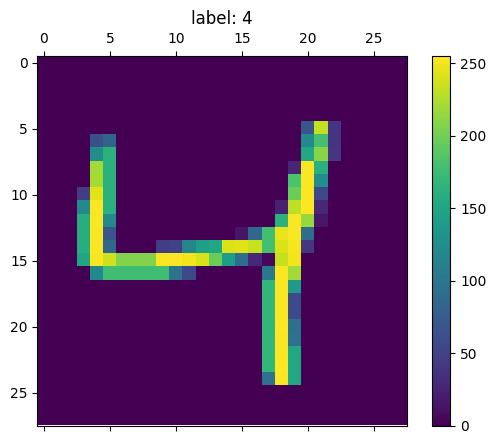

In [73]:
# Testing training data
fig, ax = plt.subplots()
c = ax.matshow(x_train[2])
fig.colorbar(c, ax = ax)
ax.set_title(f"label: {str(y_train[2])}")
plt.show()

In [74]:
# Scale the vectors
x_train = x_train/255
x_test = x_test/255

In [75]:
# Flatten the 28X28 matrix to 784X1 vector
x_train_flattened = x_train.reshape(x_train.shape[0],784)
x_test_flattened = x_test.reshape(x_test.shape[0],784)
print(f"Train: {x_train_flattened.shape}\nTest: {x_test_flattened.shape}")

Train: (60000, 784)
Test: (10000, 784)


In [76]:
# Model initialization
model = keras.Sequential((keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")))

In [77]:
# Model compilation
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4634 - accuracy: 0.8791
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3036 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2828 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2729 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9258


In [78]:
# Evaluate on test dataset
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2667 - accuracy: 0.9252


[0.2666736841201782, 0.9251999855041504]

In [82]:
# prediction
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 3ms/step


array([2.2281431e-02, 2.9337980e-07, 5.3692356e-02, 9.6912235e-01,
       2.0973803e-03, 1.1780081e-01, 1.1619442e-06, 9.9983037e-01,
       9.3888089e-02, 6.8311870e-01], dtype=float32)

7


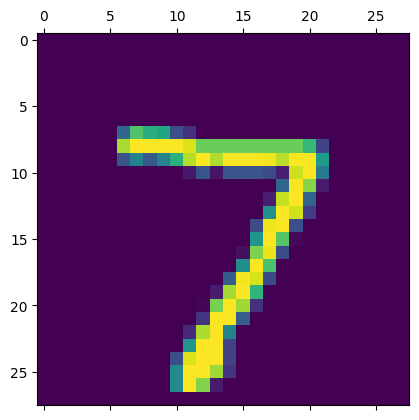

In [83]:
# Show result
plt.matshow(x_test[0])
print(np.argmax(y_predicted[0]))

In [84]:
# Confusion matrix
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

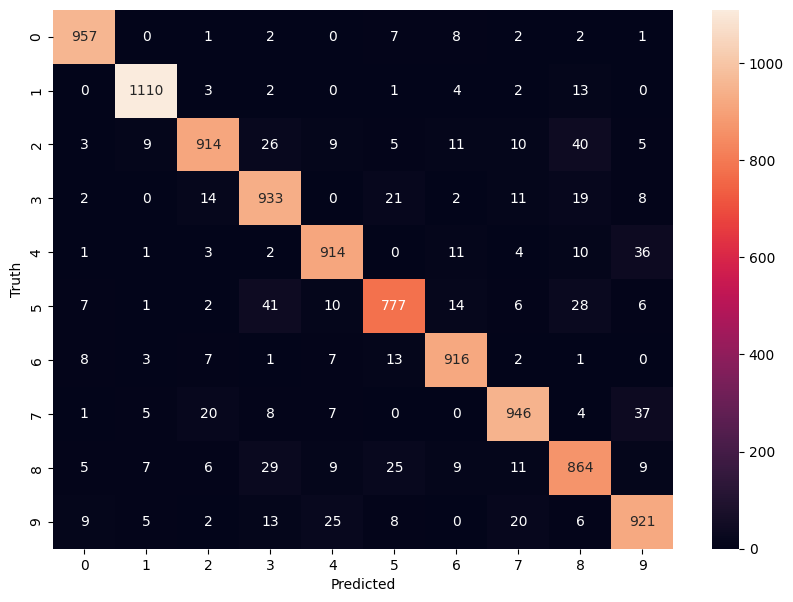

In [87]:
# Visulaize confussion matrix
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')